In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import pandas as pd

ratings_path = '/content/drive/My Drive/movie_data/db/ratings.csv'

In [47]:
notas = pd.read_csv(ratings_path)

In [48]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [49]:
notas.shape

(100836, 4)

In [50]:
notas['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [51]:
notas['rating'].value_counts()

,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [52]:
print(f"Media:", notas['rating'].mean())
print(f"Mediana:", notas['rating'].median())

Media: 3.501556983616962
Mediana: 3.5


In [53]:
notas.rating.head()

,rating
0,4.0
1,4.0
2,4.0
3,5.0
4,5.0


<Axes: ylabel='Frequency'>

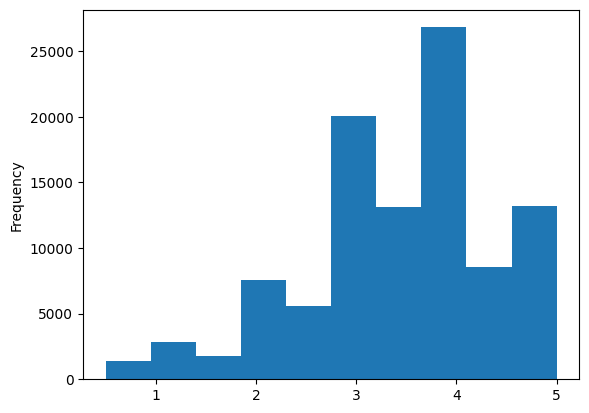

In [54]:
notas.rating.plot(kind='hist')

In [55]:
notas.rating.describe()

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [56]:
import seaborn as sns

<Axes: ylabel='rating'>

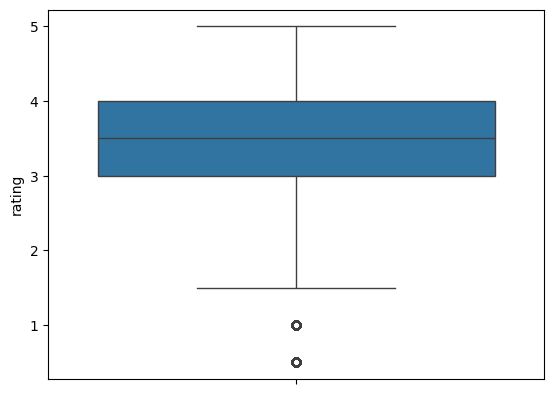

In [61]:
sns.boxplot(notas.rating)

In [62]:
 movies_path = '/content/drive/My Drive/movie_data/db/movies.csv'

In [63]:
filmes = pd.read_csv(movies_path)

In [64]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando notas específicas para os filmes

In [66]:
notas.query("movieId==1").rating.mean()

np.float64(3.9209302325581397)

In [70]:
medias_por_filme = notas.groupby("movieId").mean()["rating"]

In [71]:
medias_por_filme.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

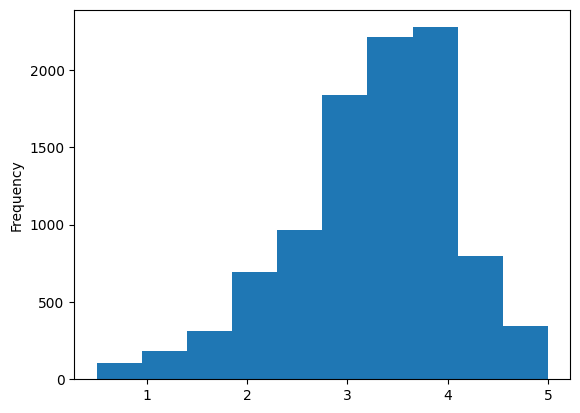

In [73]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='rating'>

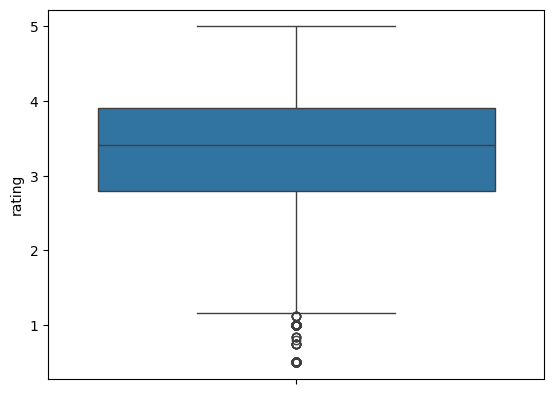

In [74]:
sns.boxplot(medias_por_filme)

In [75]:
medias_por_filme.describe()

,rating
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


/tmp/ipython-input-3658817402.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=5)


<Axes: xlabel='rating', ylabel='Density'>

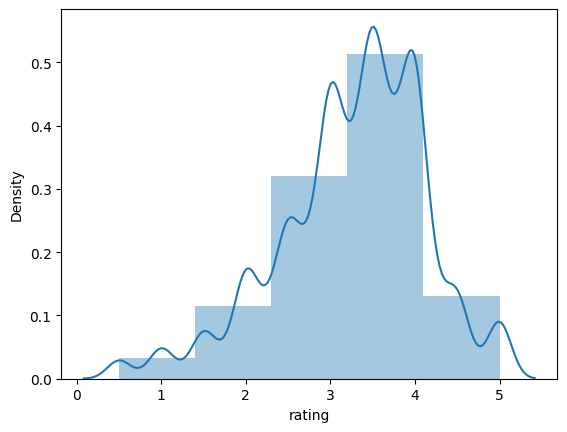

In [78]:
sns.distplot(medias_por_filme, bins=5)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

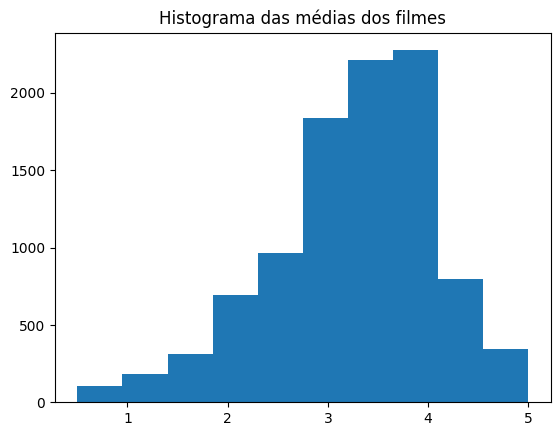

In [80]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

In [81]:
path_tmdb_movies = '/content/drive/My Drive/movie_data/db/tmdb_5000_movies.csv'

tmdb = pd.read_csv(path_tmdb_movies)

In [82]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [85]:
# Variável categórica (sem ordem)

tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [88]:
# Série
# tmdb["original_language"].value_counts()

# Para df
contagem_de_linguas = tmdb["original_language"].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language", "total"]

In [89]:
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

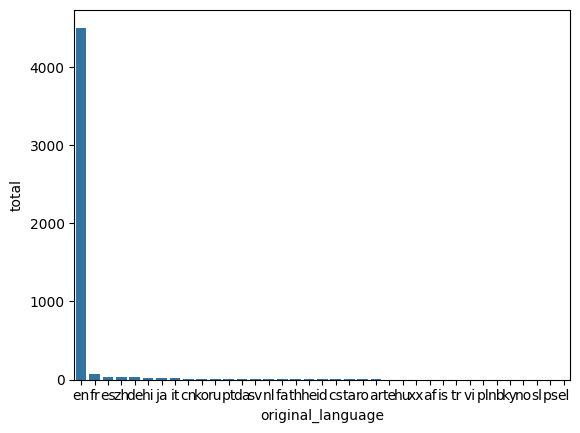

In [90]:
sns.barplot(x="original_language", y="total", data=contagem_de_linguas)

In [95]:
print(sns.__version__)

0.13.2


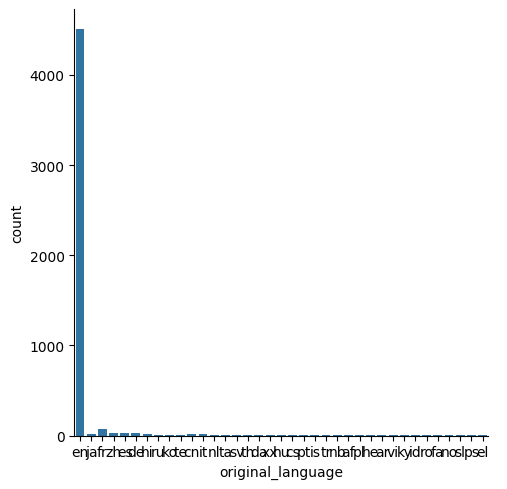

In [93]:
sns.catplot(x="original_language", kind="count", data=tmdb)

([<matplotlib.patches.Wedge at 0x792f301495d0>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'en'),
  Text(1.0355355060813987, -0.371033981792425, 'fr'),
  Text(1.0579676532751783, -0.30117178590202043, 'es'),
  Text(1.0687996896821872, -0.2601292435218708, 'zh'),
  Text(1.0773192231958597, -0.22222351660584796, 'de'),
  Text(1.0835168605253713, -0.18971350230609152, 'hi'),
  Text(1.0875755883723952, -0.16486157701671572, 'ja'),
  Text(1.0906010458121063, -0.14348992603503677, 'it'),
  Text(1.092883468191142, -0.12492287602557497, 'cn'),
  Text(1.094639090663068, -0.10846778873163951, 'ko'),
  Text(1.0960865548595407, -0.0927052547385707, 'ru'),
  Text(1.097205502470541, -0.078358696699014, 'pt'),
  Text(1.0979654406138135, -0.06687220063460171, 'da'),
  Text(1.0984565068410161, -0.05825206072434674, 'sv'),
  Text(1.0987803772611597, -0.05178496447641595, 'nl'),
  Text(1.0990363134163792, -0.04603457170578121, 'fa'),
  Text(1.0992355467780295, -0.041002593815593756, 'th'),
  Text(1

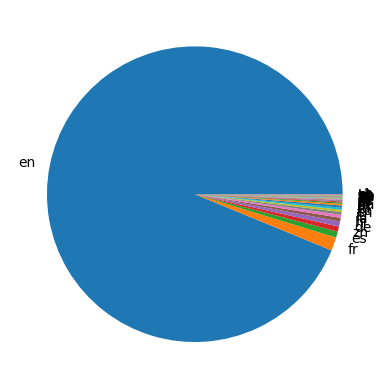

In [97]:
plt.pie(contagem_de_linguas["total"], labels=contagem_de_linguas["original_language"])

In [103]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc["en"]
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)

4505 298


In [105]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [np.int64(4505), np.int64(298)]}

In [106]:
dados = pd.DataFrame(dados)

In [107]:
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

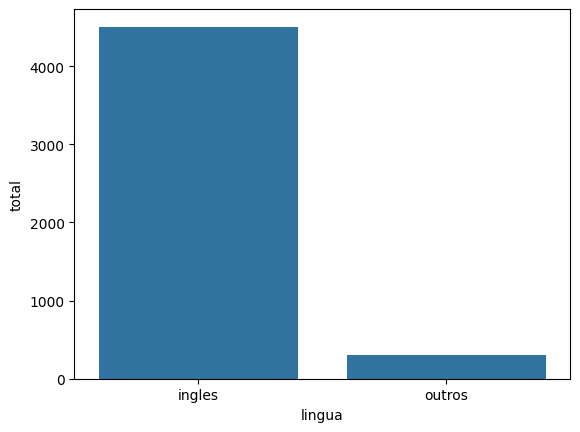

In [108]:
sns.barplot(x="lingua", y="total", data=dados)

([<matplotlib.patches.Wedge at 0x792f31323150>,
 [Text(-1.0791697944848757, 0.21305528548118974, 'ingles'),
  Text(1.0791697115180023, -0.21305570572540808, 'outros')])

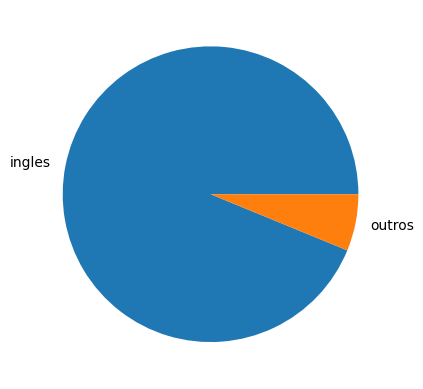

In [109]:
plt.pie(dados["total"], labels=dados["lingua"])

In [134]:
outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts().to_frame().reset_index()

In [139]:
outras_linguas

,original_language,count
0,fr,70
1,es,32
2,zh,27
3,de,27
4,hi,19
5,ja,16
6,it,14
7,cn,12
8,ko,11
9,ru,11


/tmp/ipython-input-1845052629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="original_language", y="count", data=outras_linguas, palette="GnBu_d")


<Axes: xlabel='original_language', ylabel='count'>

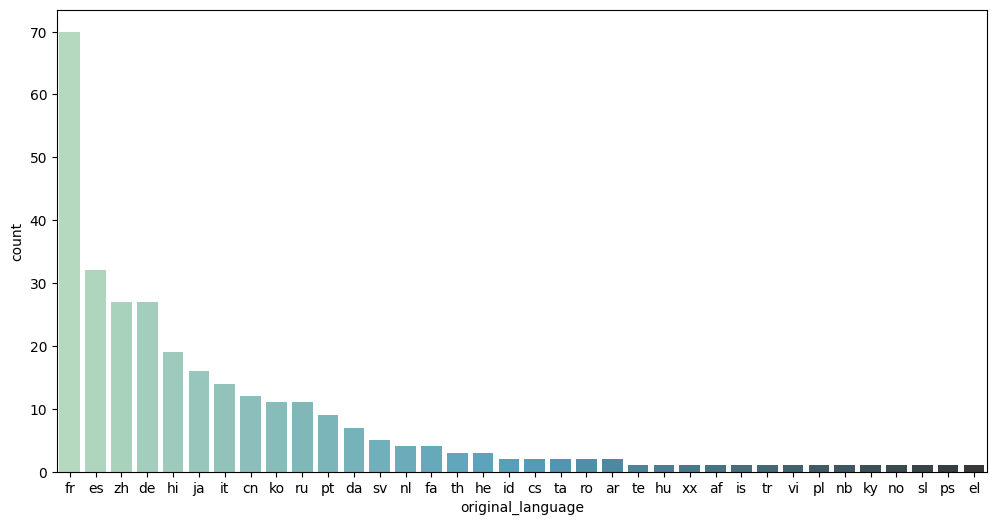

In [154]:
plt.figure(figsize=(12, 6))
sns.barplot(x="original_language", y="count", data=outras_linguas, palette="GnBu_d")

In [158]:
notas_toystory = notas.query("movieId==1")
notas_jumanji = notas.query("movieId==2")
print(len(notas_toystory), len(notas_jumanji))

215 110


In [170]:
notas_toystory.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [161]:
print(f"Nota média do Toy Story: %.2f" % notas_toystory.rating.mean())
print(f"Nota média do Jumanji: %.2f" % notas_jumanji.rating.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [162]:
print(f"Mediana das notas do Toy Story: %.2f" % notas_toystory.rating.median())
print(f"Mediana das notas do Jumanji: %.2f" % notas_jumanji.rating.median())

Mediana das notas do Toy Story: 4.00
Mediana das notas do Jumanji: 3.50


{'whiskers': [<matplotlib.lines.Line2D at 0x792f27b2b410>,
 'caps': [<matplotlib.lines.Line2D at 0x792f27b3ca50>,
 'boxes': [<matplotlib.lines.Line2D at 0x792f27b2a950>,
 'medians': [<matplotlib.lines.Line2D at 0x792f27b3e1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x792f27b3ed10>,
 'means': []}

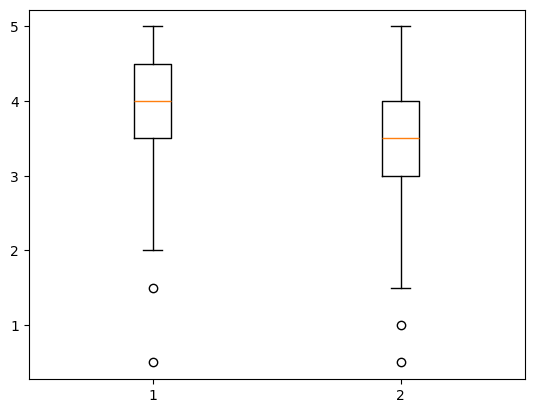

In [172]:
plt.boxplot([notas_toystory.rating, notas_jumanji.rating])

/tmp/ipython-input-1225675554.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="movieId", y="rating", data = notas.query("movieId in [1,2,3,4,5]"), palette="deep")


<Axes: xlabel='movieId', ylabel='rating'>

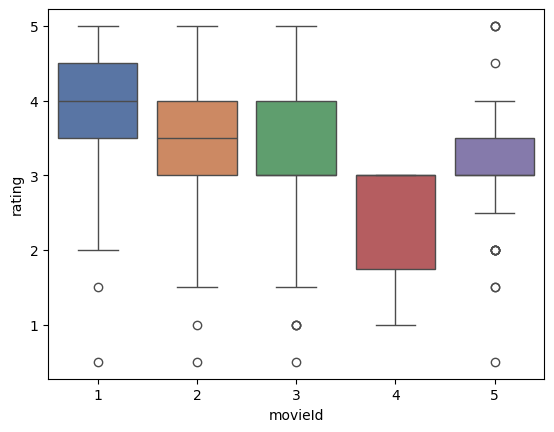

In [176]:
sns.boxplot(x="movieId", y="rating", data = notas.query("movieId in [1,2,3,4,5]"), palette="deep")

In [178]:
print(notas_toystory.rating.std())
print(notas_jumanji.rating.std())

0.8348591407114045
0.8817134921476455


In [86]:
# Filme mais lucrativo

tmdb['profit'] = tmdb['revenue'] - tmdb['budget']
most_profitable_movie = tmdb.loc[tmdb['profit'].idxmax()]
display(most_profitable_movie[['title', 'profit']])

,0
title,Avatar
profit,2550965087
